In [10]:
n = 300
y = (x) -> x*4+3
values = zeros(n)

for i in 1:n
   values[i] = y(i) + randn()*abs(n/2-i)
end

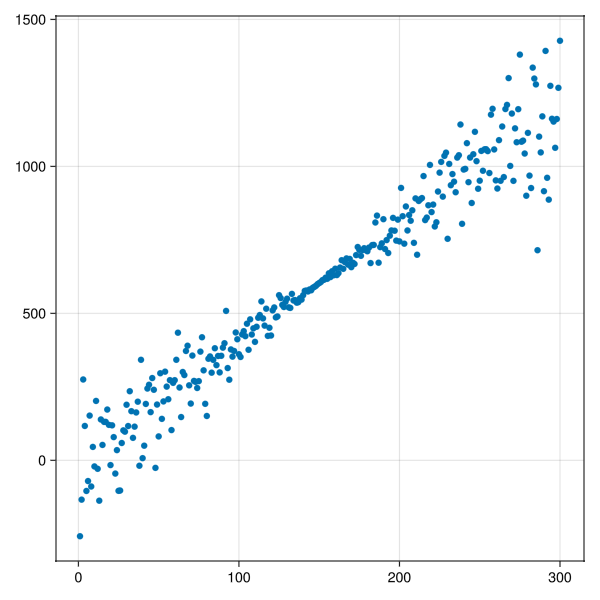

GLMakie.Screen(...)

In [11]:
using GLMakie
fig = Figure(size = (600, 600))
axis = Axis(fig[1,1])

Makie.inline!(true)

scatter!(axis, 1:300, values)

display(fig)

# Métodos dos Mínimos Quadrados

Tendo que o chamado *resíduo* é definido como
$$\epsilon_{x_i} = y_{x_i} - \hat{y}_{x_i}$$

Quero encontrar a reta $y = ax+b$ que minimize  a soma dos quadrados dos *resíduos*.

$$\argmin_{\hat{y}_{x_i}}{\sum_i^n (y_{x_i} - \hat{y}_{x_i})^2 } \Rightarrow \argmin_{a, b} \sum_i^n (y_{x_i} - ax_i - b)^2 $$

Note pela otimização ser em relação a uma função dependente de 2 parâmetros, devemos encontrar a função gradiente e iguala-lá a 0.

$$
∇ \sum_i^n \epsilon_{x_i}^2 \implies \sum_i^n∇\epsilon_{x_i}^2 = \Biggl[ \sum_i^n \frac {δϵ_{x_i}^2} {δa} , \sum_i^n \frac {δϵ_{x_i}^2} {δb} \Biggr] = 0
$$

Primeiro, vamos começar derivando em relação a $a$.
$$\begin{align*}
    \frac {δϵ_{x_i}^2} {δa} &= \frac {δ} {δa} (y_{x_i} - ax_i - b)^2 \\
    &\xlongequal{\text{cadeia}} \frac {δu^2} {δu} * \frac {δ} {δa} (y_{x_i} - ax_i - b)^2, \text{ com }u = y_{x_i} - ax_i - b \\
    &= 2u * (0 - x_i + 0) = 2u(-x_i) = -2x_iu \implies 2x_i(ax_i + b - y_{x_i}) \\
    ∴ \frac {δϵ_{x_i}^2} {δa} &= 2x_i(ax_i + b - y_{x_i})
\end{align*}$$

Agora, em relação a $b$.

$$\begin{align*}
    \frac {δϵ_{x_i}^2} {δb} = ... &= \frac {δu^2} {δu} * \frac {δ} {δb} (y_{x_i} - ax_i - b)^2 \\
    &= -2u \implies 2(ax_i+b-y_{x_i}) \\
    ∴ \frac {δϵ_{x_i}^2} {δb} &= 2(ax_i + b - y_{x_i})
\end{align*}$$

Logo 
$$ \sum_i^n∇\epsilon_{x_i}^2(a,b) = \biggl[ 2 \sum_i^n x_i(ax_i+b-y_{x_i}) , 2\sum_i^n (ax_i+b-y_{x_i})\biggr] = 0 \\

∇f(a,b) = \biggl[ 2 \sum_i^n x_i(ax_i+b-y_{x_i}) , 2\sum_i^n (ax_i+b-y_{x_i})\biggr] = 0 

$$

Igualando ambas as derivadas a 0, teremos:
$$
\def\xsum{\sum_i^nx_i}

\begin{gather}
a\xsum^2+ b\xsum - \xsum y_{x_i} &= 0 \\
a\xsum+ nb - \sum_i^n y_{x_i} &= 0
\end{gather}
$$
Da eq. 2, conseguimos:
$$
\def\xsum{\sum_i^nx_i}

b = \frac {\sum_i^n y_{x_i} - a\xsum} {n} \tag {3}

$$


Da 1, usando a 3:

$$
\begin{align*}
\def\xsum{\sum_i^nx_i}

&a\xsum^2+ \frac {\sum_i^n y_{x_i} - a\xsum} {n} * \xsum - \xsum y_{x_i} = 0 \\ 
\implies &
a\xsum^2+ \frac {\sum_i^n y_{x_i} \xsum - a(\xsum)^2} {n} - \xsum y_{x_i} = na\xsum^2+ \sum_i^n y_{x_i} \xsum - a\Bigl(\xsum\Bigr)^2 - n \xsum y_{x_i} = 0 \\
\implies &
a\Bigg(n \xsum^2 - \Big(\xsum\Big)^2\Bigg) = n \xsum y_{x_i} - \sum_i^n y_{x_i} \xsum \\
\end{align*}

\\
\scriptsize\text{ Lembrar que a soma dos quadrados não é igual ao quadrado das somas!}
$$
$$
∴ a = \frac {n\xsum y_{x_i} - \sum_i^n y_{x_i} \xsum}{n \xsum^2 - \big(\xsum\big)^2} \tag{4}
$$

Para termos $b$ sem ser em função de $a$, substituímos 4 em 1. _Se substituíssemos 4 em 3, teríamos de volta a equação 1, o que não seria útil_.

$$ ∴ b = \frac {\sum_i^n y_{x_y}\xsum² - \xsum y_{x_i} \xsum}{n \xsum^2 - \big(\xsum\big)^2}$$

Finalmente! Agora tudo que precisamos para calcular a reta que melhor descreve o conjunto de pontos é: a soma de x, a soma de y, a soma de x², a soma de x*y.

In [ ]:
sums = ( x = sum(1:n), y = sum(values), xy = sum((1:n).*values), xx = sum((1:n) .^2) )

(x = 1414.905849945068, y = 180894.45646203094, xy = 943613.8402888593, xx = 6951.934250235208)

In [22]:
function a(sums, n)
    return (n * sums.xy - sums.x * sums.y) / (n * sums.xx - sums.x^2)
end

function b(sums, n, a)
    return (sums.y - a * sums.x) / n
end

b (generic function with 1 method)

In [23]:
_a = a(sums, n)
_b = b(sums, n, _a)

-927.4908915216381

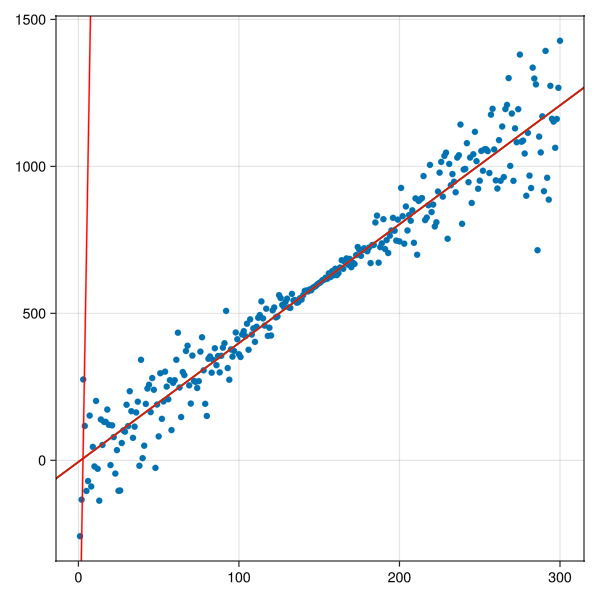

GLMakie.Screen(...)

In [24]:
ablines!(axis, _b, _a; color = :red)

display(fig)